# Bedmap Point Data
**Description:**  Individual data from Bedmap 1 for Antarctica.

**Dataset:** 

N.A.

**Associated paper:** 

Lythe, Matthew B., and David G. Vaughan. “BEDMAP: A New Ice Thickness and Subglacial Topographic Model of Antarctica.” Journal of Geophysical Research: Solid Earth 106, no. B6 (2001): 11335–51. https://doi.org/10.1029/2000JB900449.

In [1]:
%%capture
%load_ext autoreload
%autoreload 2

import pygmt

from polartoolkit import fetch, maps, regions, utils

In [2]:
version_names = [
    "bedmap1",
    # "bedmap2",
    # "bedmap3",
]

dfs = []
for name in version_names:
    df = fetch.bedmap_points(
        version=name,
        # available options
        # region,
    ).dropna()
    # df = df[0:200]
    print(df.head())
    dfs.append(df)

     trajectory_id  longitude (degree_east)  latitude (degree_north)  \
246            247                -162.2167                -78.17500   
248            249                -164.8333                -78.91666   
249            250                -168.6500                -79.15334   
250            251                -171.5167                -79.11667   
251            252                -173.9833                -78.99500   

     surface_altitude (m)  land_ice_thickness (m)  bedrock_altitude (m)  \
246                  43.0                   257.0                -607.0   
248                  48.0                   369.0                -425.0   
249                  59.0                   384.0                -539.0   
250                  49.0                   328.0                -695.0   
251                  51.0                   344.0                -536.0   

                 x             y  
246 -393747.895145 -1.227610e+06  
248 -316007.544874 -1.165778e+06  
249 -232601

In [3]:
data_to_plot = [
    # bedmap1
    [
        "surface_altitude (m)",
        "land_ice_thickness (m)",
        "bedrock_altitude (m)",
    ],
    # # bedmap2
    # [
    # ],
    # # bedmap3
    # [
    # ],
]

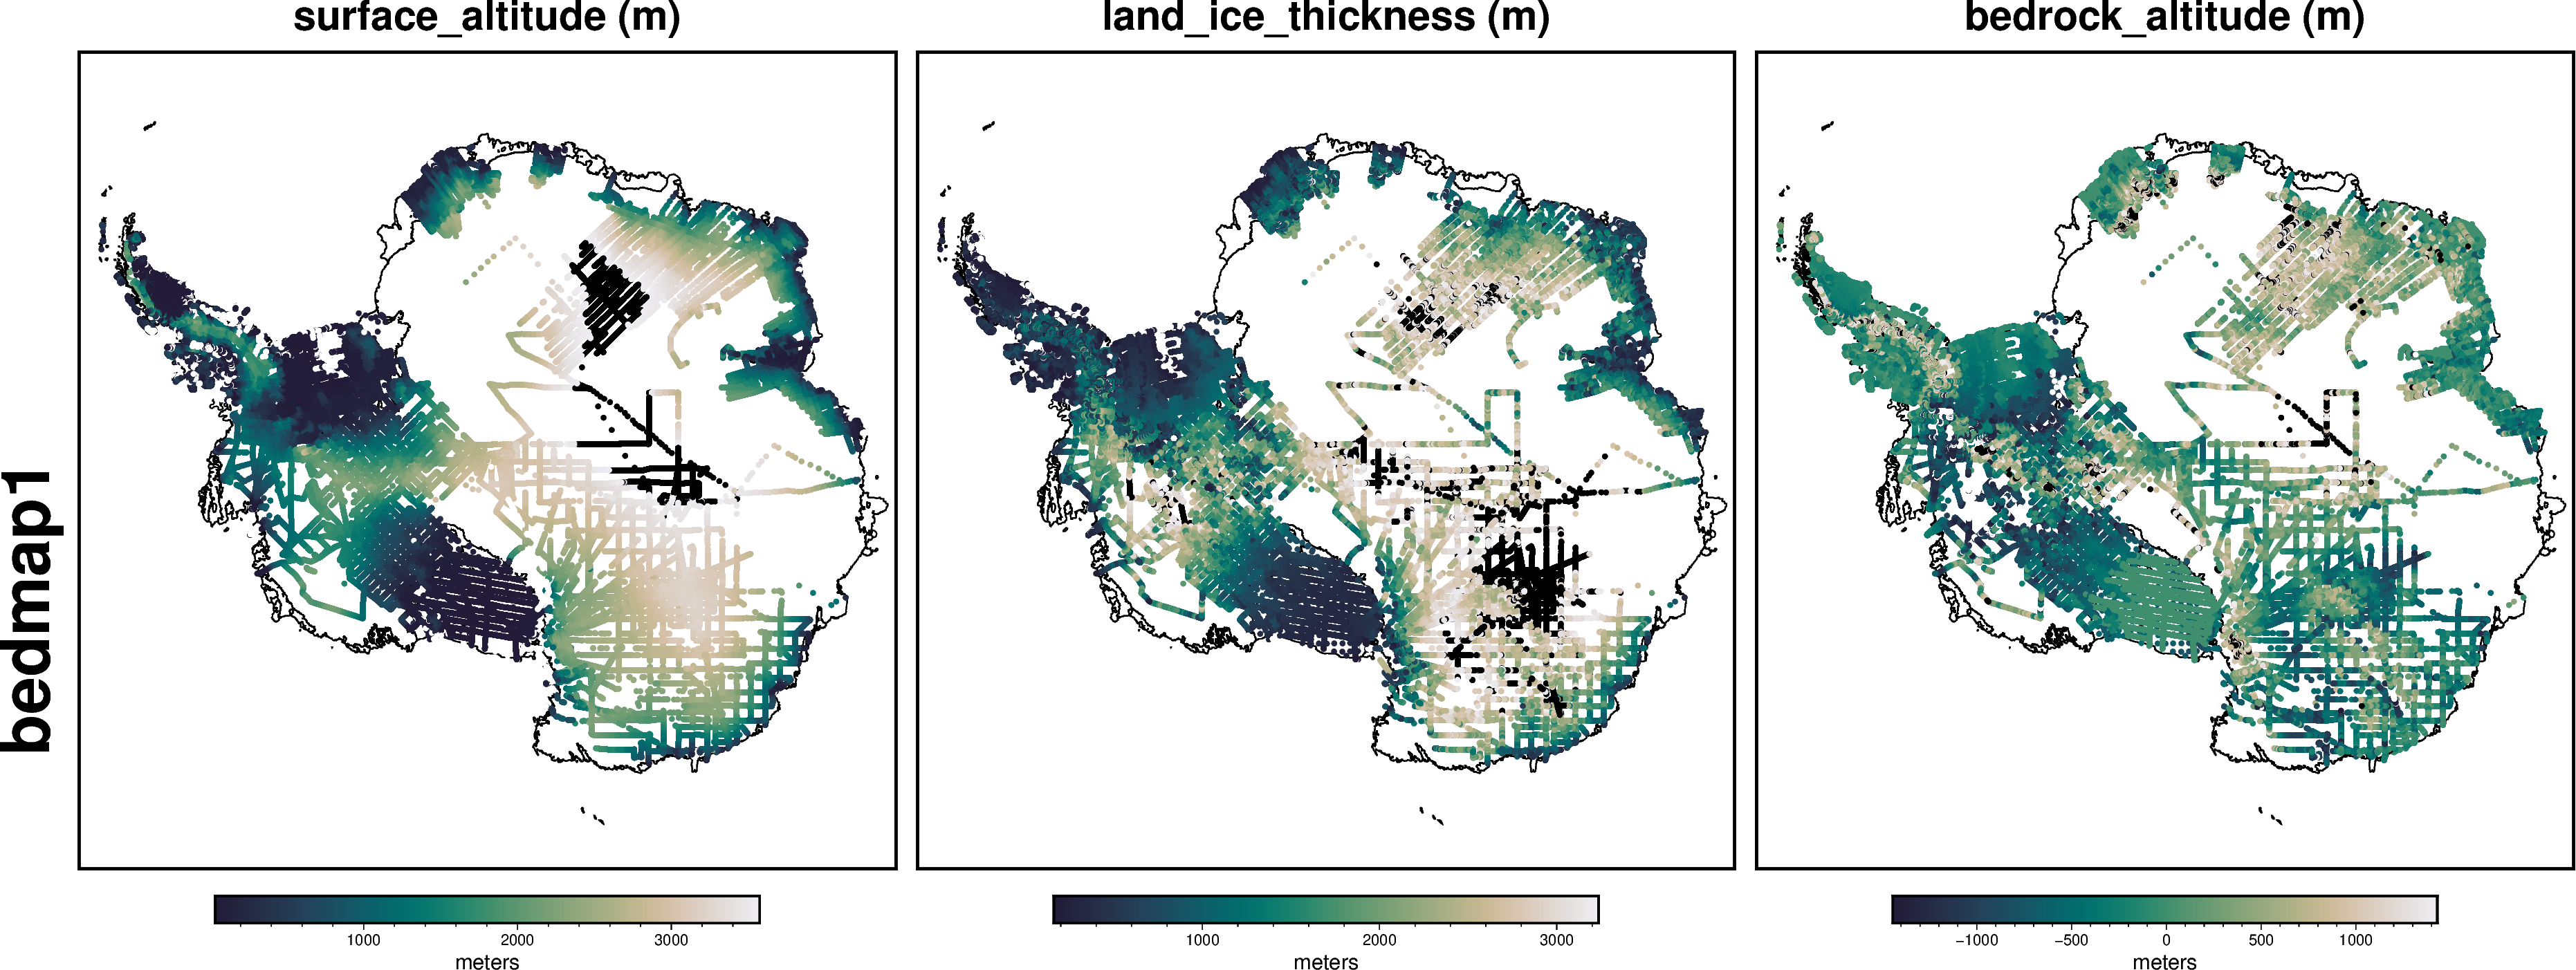

In [4]:
region = regions.antarctica

for row, (version, df) in enumerate(zip(version_names, dfs)):
    for col, data_str in enumerate(data_to_plot[row]):
        # print(f"row:{row}, col:{col}")
        # print(version, data_str)
        if (col == 0) and (row == 0):
            # initialize the overall figure
            fig = maps.basemap(
                origin_shift="initialize",
                region=region,
                coast=True,
                title=data_str,
                hemisphere="south",
            )
        elif col == 0:
            # shift left and down
            fig = maps.basemap(
                fig=fig,
                origin_shift="both",
                xshift_amount=-1 * len(data_to_plot[row - 1])
                + 1,  # shifts plot back to left
                yshift_amount=-1.02,  # shift new row down by 1
                region=region,
                coast=True,
                title=data_str,
                hemisphere="south",
            )
        else:
            # shift right
            fig = maps.basemap(
                fig=fig,
                origin_shift="x",
                region=region,
                coast=True,
                title=data_str,
                hemisphere="south",
            )
        # make a colorscale
        zmin, zmax = utils.get_min_max(df[data_str], robust=True)
        pygmt.makecpt(cmap="rain", reverse=True, series=[zmin, zmax])
        # plot the points
        fig.plot(
            x=df["x"],
            y=df["y"],
            fill=df[data_str],
            cmap=True,
            style="c.1c",
        )
        # add a colorbar
        fig.colorbar(position="JBC+o0c/.5c+w10c/.5c", frame=["x+lmeters"])
        if col == 0:
            fig.text(
                position="LM",
                justify="RM",
                offset="-1/0",
                angle=90,
                text=version,
                font="35p,Helvetica-Bold",
                no_clip=True,
            )

fig.show(dpi=200)